# 

In [227]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import t

%matplotlib inline

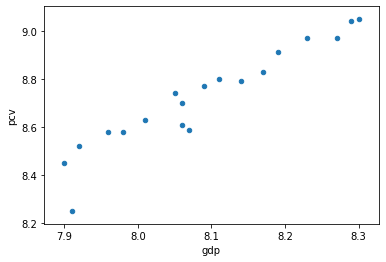

In [230]:
gdp_pcv = pd.DataFrame(
    {
        'gdp': [7.90, 7.92, 7.91, 7.96, 7.98, 8.01, 8.05, 8.06, 8.06, 8.07, 8.09, 8.11, 8.14, 8.17, 8.19, 8.23, 8.27, 8.29, 8.30], 
        'pcv': [8.45, 8.52, 8.25, 8.58, 8.58, 8.63, 8.74, 8.70, 8.61, 8.59, 8.77, 8.80, 8.79, 8.83, 8.91, 8.97, 8.97, 9.04, 9.05]
    }
    )

X = gdp_pcv['gdp']
X_pred = np.linspace(X.min(), X.max(), 50)

X = sm.add_constant(X)
X_pred = sm.add_constant(X_pred)

y = gdp_pcv['pcv']

gdp_pcv = sm.add_constant(gdp_pcv)

gdp_pcv.plot.scatter('gdp','pcv')

In [231]:
results = ols('pcv ~ gdp', data=gdp_pcv).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pcv   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.64e-10
Time:                        15:22:32   Log-Likelihood:                 25.519
No. Observations:                  19   AIC:                            -47.04
Df Residuals:                      17   BIC:                            -45.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0913      1.000     -4.092      0.0

/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


/opt/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


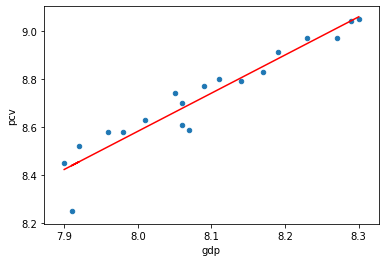

In [217]:
gdp_pcv.plot.scatter('gdp','pcv')

y_pred = results.predict(gdp_pcv[['gdp','const']])

plt.plot(gdp_pcv['gdp'], y_pred, color='red')

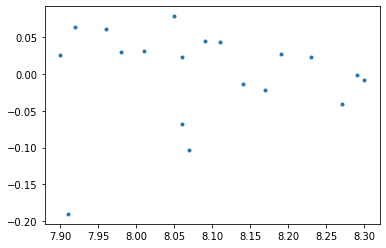

In [218]:
plt.plot(X['gdp'], results.resid, linestyle='', marker='.')

In [219]:
results.mse_model/results.mse_resid

164.36189511727983

In [220]:
table = sm.stats.anova_lm(results) # Type 2 ANOVA DataFrame
print(table)

            df    sum_sq   mean_sq           F        PR(>F)
gdp        1.0  0.732872  0.732872  164.361895  3.635325e-10
Residual  17.0  0.075801  0.004459         NaN           NaN


In [221]:
0.732872/0.004459

164.3579277864992

In [222]:
results.tvalues

Intercept    -4.092029
gdp          12.820370
dtype: float64

(-13.820370319038345, 13.820370319038345)

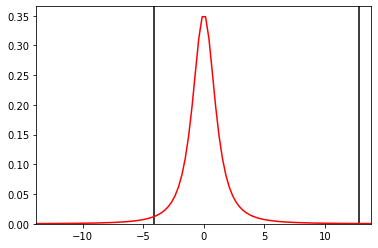

In [223]:
df = 2

x = np.linspace(-r-1,
                r+1, 100)
plt.plot(x, t.pdf(x, df),
       'r-', label='t pdf')

y_min, y_max = plt.ylim()

plt.vlines(results.tvalues, 0, y_max)

plt.ylim(0, y_max)

r = abs(results.tvalues).max()
plt.xlim(-r-1, r+1)

In [224]:
fitted_data = gdp_pcv.copy()
fitted_data['fittedvalues'] = results.fittedvalues

In [225]:
fitted_data['$\left(\hat{Y}_i - Y_i\right)^2$'] = (fitted_data['pcv'] - fitted_data['fittedvalues'])**2

fitted_data['$\left(\hat{Y}_i - Y_i\right)^2$'] = (fitted_data['pcv'] - fitted_data['fittedvalues'])**2

In [226]:
fitted_data.head()

,const,gdp,pcv,fittedvalues,$\left(\hat{Y}_i - Y_i\right)^2$
0,1.0,7.90,8.45,8.424256,0.000663
1,1.0,7.92,8.52,8.455941,0.004104
2,1.0,7.91,8.25,8.440099,0.036138
3,1.0,7.96,8.58,8.519311,0.003683
4,1.0,7.98,8.58,8.550996,0.000841
